# IA006 - Exercícios de Fixação de Conceitos - EFC2

## Fernanda Ferreira, RA: 163676
## Renan Del Buono Brotto, RA: 137442

# Parte 1 - Teoria Bayesiana de Decisão



(a) $p(x|C_1) = N(0,1) = \dfrac{1}{\sqrt{2\pi}\sigma_1} e^{(x-\mu)^2/(2\sigma_1^2)} = \dfrac{1}{\sqrt{2\pi}}e^{-x^2/2}$  

$p(x|C_2) = N(0,2) = \dfrac{1}{\sqrt{2\pi}\sigma_2} e^{(x-\mu)^2/(2\sigma_2^2)} = \dfrac{1}{\sqrt{4\pi}} e^{-x^2/4} $

Para determinarmos a fronteira de decisão (neste caso a fronteira corresponde a pontos, uma vez que estamos lidando com o caso unidimensional e duas classes), vamos analisar quando as duas distribuições de probabilidade se igualam:

$p(x|C_1) = p(x|C_2)$


$\dfrac{1}{\sqrt{2\pi}}e^{-x^2/2} = \dfrac{1}{\sqrt{2}\sqrt{2\pi}}e^{-x^2/4}$

$e^{-x^2/2} = \dfrac{1}{\sqrt{2}}e^{-x^2/4}$

$e^{(-x^2/2 + x^2/4)} = \dfrac{\sqrt{2}}{2} \;\;$ (I)

De (I) temos:

$\dfrac{-x^2}{2} + \dfrac{-x^2}{4} = ln\Bigg(\dfrac{\sqrt{2}}{2}\Bigg)$

$\dfrac{-x^2}{4} = -0,3466$

$x^2 = 1, 3863 \; \rightarrow \; \boxed{x = \pm 1,1774}$

Logo, se $x' \leq -1,1774$ ou $x' \geq 1,1774$, então decidimos que $x'$ pertence à classe $C_2$.



In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

passo = 1e-3
x = np.arange(-3, 3+passo, passo)
assintota = np.arange(0, 0.41, passo)
p1 = np.exp((-x**2)/2)/(np.sqrt(2*np.pi))
p2 = np.exp(-(x**2)/4)/(np.sqrt(4*np.pi))

#Grafico comparativo entre as probabilidades de pertencimento as classes C1 e C2
plt.plot(x, p1, 'b-')
plt.plot(x, p2, 'r-')
plt.axvline(x=1.1774) #assintota 1
plt.axvline(x=-1.1774) #assintota 2
plt.gca().legend(('$p(x|C_1)$','$p(x|C_2)$'))
plt.xlabel('x')
plt.ylabel('$p_1$, $p_2$')
plt.text(-0.7, 0.10, '$C_1$', fontsize=50)
plt.text(-2.7, 0.20, '$C_2$', fontsize=50)
plt.text(1.5, 0.20, '$C_2$', fontsize=50)
plt.title('Comparativo entre as probabilidades')
plt.grid()
plt.show()

<Figure size 640x480 with 1 Axes>

(b) Como temos apenas duas classes e $p(C_1) = 2p(C_2)$, temos que $p(C_1) = \dfrac{2}{3}$ e  $p(C_2) = \dfrac{1}{3}$, de modo que a soma das probabilidades _a priori_ totalize 1.

Assim sendo, temos

$p(x|C_1)p(C_1) = \dfrac{2}{3}\dfrac{1}{\sqrt{2\pi}}e^{-x^2/2}$

$p(x|C_2)p(C_2) = \dfrac{1}{3}\dfrac{1}{\sqrt{4\pi}}e^{-x^2/4}$

Analisando o ponto de igualdade:

$p(x|C_1)p(C_1) = p(x|C_2)p(C_2)$

$\dfrac{2}{3}\dfrac{1}{\sqrt{2\pi}}e^{-x^2/2} = \dfrac{1}{3}\dfrac{1}{\sqrt{4\pi}}e^{-x^2/4}$

$e^{-x^2/2}e^{x^2/4} = \dfrac{1}{2\sqrt{2}}$

$e^{-x^2/4} = \dfrac{\sqrt{2}}{4}$

$\dfrac{x^2}{4} = -ln\Bigg( \dfrac{\sqrt{2}}{4} \Bigg) \; \rightarrow \; x^2 = 4,1589 \; \rightarrow \; \boxed{x = \pm 2,0393}$

Portanto, para $x' \leq -2,0393$ ou $x' \geq 2,0393$, decidimos que $x'$ pertence à classe $C_2$.


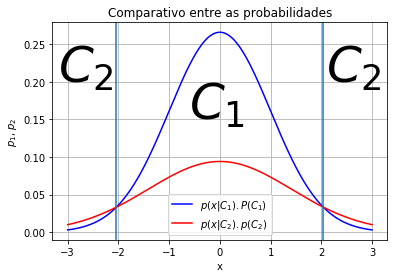

In [2]:
#Grafico comparativo entre as probabilidades de pertencimento as classes C1 e C2
plt.plot(x, 2*p1/3, 'b-')
plt.plot(x, p2/3, 'r-')
plt.axvline(x=2.0393) #assintota 1
plt.axvline(x=-2.0393) #assintota 2
plt.gca().legend(('$p(x|C_1).P(C_1)$','$p(x|C_2).p(C_2)$'))
plt.xlabel('x')
plt.ylabel('$p_1$, $p_2$')
plt.text(-0.6, 0.15, '$C_1$', fontsize=50)
plt.text(-3.2, 0.20, '$C_2$', fontsize=50)
plt.text(2.1, 0.20, '$C_2$', fontsize=50)
plt.title('Comparativo entre as probabilidades')
plt.grid()
plt.show()

(c) O que percebemos da comparação dos resultados dos itens (a) e (b) é que a probabilidade _a priori_ das classes levou à uma modificação da fronteira (ou pontos) de decisão. O fato de que um dado valor $x'$ tem o dobro de chance de pertencer à classe $C_1$ do que a classe $C_2$ levou à uma expansão da fronteira de decisão, aumentando o intervalo de valores pertencentes à classe $C_1$ de $-1,1774 < x' < 1,1774$ para $-2,0393 < x' < 2,0393$. Em síntese, a informação _a priori_ sobre as classes "favoreceu" a classe $C_1$, devido ao "desequilíbrio" entre as probabilidades das classes consideradas.

# Parte 2 - Classificação Binária


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools


In [4]:
def classificacao(y, w0):
    #recebe os valores projetados na forma de um vetor linha e o limiar de classificacao w0
    #retorna um vetor linha com os resultados da classificacao para cada padrao
    
    resultado = np.zeros(y.shape)
    for i in range(0, y.shape[1]):
        if(y[0,i] < w0):
            resultado[0,i] = 1 #valor projetado inferior a w0 -> classe 1 (rotulo 0)
        else:
            resultado[0,i] = 0 #valor projetado não e inferior a w0 -> classe 2 (rotulo 1)
    
    return resultado

In [5]:
def regressao_logistica(phi, MAX_EPOCAS, taxa_adaptacao, referencia):
    #parametros: matriz de entrada N x K+1; numero de epocas; taxa de adaptacao e limiar de classificacao
    #retorna o vetor de coeficientes na forma de vetor coluna
    #w = np.zeros((phi.shape[1], 1))
    
    w = np.random.normal(loc=0.0, scale=1, size=(phi.shape[1], 1))
    N = phi.shape[0]
    evolucao_norma_grad = np.zeros((MAX_EPOCAS,1))
    evolucao_norma_w = np.zeros((MAX_EPOCAS,1))
    evolucao_erro_medio = np.zeros((MAX_EPOCAS,1))
    
    for n in range(0, MAX_EPOCAS):
        estimativa = np.matmul(phi, w)       
        estimativa = 1 + np.exp(-estimativa)
        estimativa = 1/estimativa
        erro = referencia-estimativa       
        grad = np.matmul(erro.T, phi)
        grad = grad.T       
        grad = -grad/N
        w = w - taxa_adaptacao*grad
        evolucao_norma_grad[n] = np.linalg.norm(grad)
        evolucao_norma_w[n] = np.linalg.norm(w)
        evolucao_erro_medio[n] = np.mean(erro**2)
    
    return w, evolucao_norma_grad, evolucao_norma_w, evolucao_erro_medio
    

In [6]:
def avaliacao_logistica(w, padrao):
    estimativa = np.dot(padrao, w)       
    estimativa = 1 + np.exp(-estimativa)
    estimativa = 1/estimativa
    return estimativa

In [7]:
def imprime_matriz_confusao(matriz_confusao, classes):
    print('\t', end=" ")
    for classe in classes:
        print("{:^6s}".format(classe), end=" ")        
    
    print()
    
    for i in range(0, matriz_confusao.shape[0]):
        print(classes[i], end =" ")
        print('\t', end=" ")
        for j in range(0, matriz_confusao.shape[0]):            
            #print("{:08.6f}".format(matriz_confusao[i,j]), end=" ")
            print("{:2d}".format(matriz_confusao[i,j]), end=" ")
            print('\t', end=" ")
        print()


In [8]:
def calcula_metricas(estimativa, referencia):
    #recebe como parametros os resultados produzidos pelo modelo na forma de vetor linha
    # e os valores desejados, tambem na forma de vetor linha
    #retorna TP, TN, FP e FN
    
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    for i in range(0, estimativa.shape[1]):
        if  estimativa[0,i] == 1 and referencia[0,i] == 1:
            TP = TP + 1
        elif estimativa[0,i] == 0 and referencia[0,i] == 0:
            TN = TN + 1
        elif estimativa[0,i] == 0 and referencia[0,i] == 1:
            FN = FN + 1
        elif estimativa[0,i] == 1 and referencia[0,i] == 0:
            FP = FP + 1
            
    return TP, TN, FP, FN
    

## Item (a)

In [9]:
#Leitura dos Dados
dados_two_moons = pd.read_csv('./data/two_moons.csv')
matriz_two_moons = np.asarray(dados_two_moons) #col 0: ind, col 1: x_1, col 2: x2, col 3: y

classe1 = matriz_two_moons[matriz_two_moons[:, 3]==0]
classe2 = matriz_two_moons[matriz_two_moons[:, 3]==1]

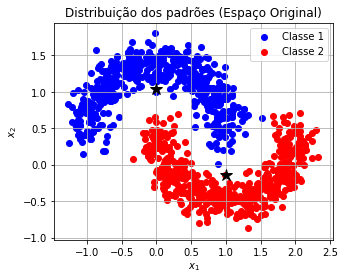

Distância entre as médias sobre o eixo x1:  [1.00715884]
Distância entre as médias sobre o eixo x2:  [1.17727563]


In [10]:
x1_1 = classe1[:,1]
x2_1 = classe1[:,2]

x1_2 = classe2[:,1]
x2_2 = classe2[:,2]

u1 = np.mean(classe1[:, 1:3], axis=0)
u1 = u1.reshape(u1.shape[0], 1)
u2 = np.mean(classe2[:, 1:3], axis=0)
u2 = u2.reshape(u2.shape[0], 1)

plt.figure(figsize=(5,4))
disp1 = plt.scatter(x1_1, x2_1, c='b')
disp2 = plt.scatter(x1_2, x2_2, c='r')
plt.plot(u1[0], u1[1], '*k',markersize=12)
plt.plot(u2[0], u2[1], '*k', markersize=12)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.legend((disp1, disp2), ('Classe 1', 'Classe 2'))
plt.title('Distribuição dos padrões (Espaço Original)')
plt.show()

print('Distância entre as médias sobre o eixo x1: ', abs(u1[0]-u2[0]))
print('Distância entre as médias sobre o eixo x2: ', abs(u1[1]-u2[1]))

Aplicando o diagrama de dispersão sobre os dados no espaço original obtivemos o resultado acima. Notamos a formação bem definida de duas classes para este problema, as quais não são linearmente separáveis. Podemos notar que as duas classes apresentam uma dispersão maior na direção do eixo horizontal, correspondente ao atributo $x_1$, quando comparada à dispersão observada sobre o eixo $x_2$. Como consequência desses níveis de dispersão, ao projetarmos as duas classes sobre o eixo $x_1$ observaremos uma maior sobreposição do que se essa projeção fosse feita sobre o eixo $x_2$.

Comparando a distância entre as médias projetadas tanto sobre o eixo $x_1$ quanto sobre o eixo $x_2$, notamos distâncias similares para as duas classes (1,00 para $x_1$ e 1,17 para $x_2$). Logo esperamos que a dispersão dos dados tenha um papel mais importante no momento de calcularmos a reta de projeção.

## Item (b)


In [11]:
# Calculo do discriminante de Fisher
padroes1 = np.transpose(classe1[:, 1:4])
padroes2 = np.transpose(classe2[:, 1:4])

#Matrizes de covariancias das classes
S1 = np.zeros(u1.shape[0])
S2 = np.zeros(u2.shape[0])

for i in range(0, classe1.shape[0]):
    aux = padroes1[0:2, i].reshape(padroes1[0:2, i].shape[0], 1)-u1
    S1 = S1 + np.matmul(aux, aux.T)
    aux = padroes2[0:2, i].reshape(padroes2[0:2, i].shape[0], 1)-u2
    S2 = S2 + np.matmul(aux, aux.T)
    
Sw = S1 + S2
Sw_inv = np.linalg.inv(Sw)

w = np.matmul(Sw_inv, u1-u2)
w_fisher = w

eixo_x1 = np.arange(-1.5, 2.6, 1e-3)
eixo_x2 = (w[1]/w[0])*eixo_x1


In [12]:
w

array([[-0.00192971],
       [ 0.00988743]])

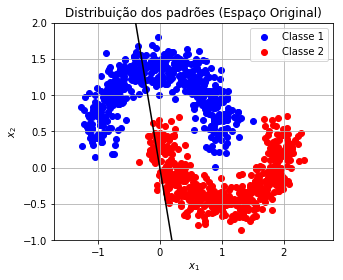

In [13]:
x1_1 = classe1[:,1]
x2_1 = classe1[:,2]

x1_2 = classe2[:,1]
x2_2 = classe2[:,2]

#medias intra classes
u1 = np.mean(classe1[:, 1:3], axis=0)
u1 = u1.reshape(u1.shape[0], 1)
u2 = np.mean(classe2[:, 1:3], axis=0)
u2 = u2.reshape(u2.shape[0], 1)

#variancias intra classes
var1 = np.var(classe1[:, 1:3], axis=0)
var1 = var1.reshape(var1.shape[0], 1)
var2 = np.var(classe2[:, 1:3], axis=0)
var2 = var2.reshape(var2.shape[0], 1)

plt.figure(figsize=(5,4))
disp1 = plt.scatter(x1_1, x2_1, c='b')
disp2 = plt.scatter(x1_2, x2_2, c='r')
plt.plot(eixo_x1, eixo_x2, c='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.ylim(-1,2)
plt.legend((disp1, disp2), ('Classe 1', 'Classe 2'))
plt.grid()
plt.title('Distribuição dos padrões (Espaço Original)')
plt.show()

In [14]:
#Projecao das classes C1 e C2 sobre w

y1 = np.zeros((1, padroes1.shape[1]))
y2 = np.zeros((1, padroes2.shape[1]))

for i in range(0, padroes1.shape[1]):
    y1[0,i] = np.dot(w.T, padroes1[0:2, i])
    y2[0,i] = np.dot(w.T, padroes2[0:2, i])                               


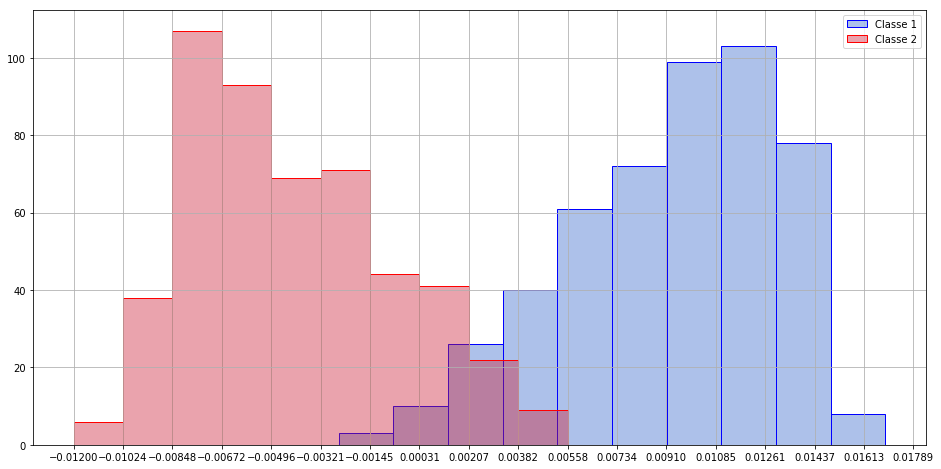

In [15]:
passo1 = (y1.max() - y1.min())/10
hist1, bin_edges1 = np.histogram(y1, bins = np.arange(y1.min(), y1.max()+passo1, passo1))

passo2 = (y2.max() - y2.min())/10
hist2, bin_edges2 = np.histogram(y2, bins = np.arange(y2.min(), y2.max()+passo2, passo2))

plt.figure(figsize=(16,8))

p1 = plt.bar(bin_edges1[:-1], hist1, width = passo1, color=(0.2, 0.4, 0.8, 0.4), edgecolor='blue')
p2 = plt.bar(bin_edges2[:-1], hist2, width = passo2, color=(0.8, 0.1, 0.2, 0.4), edgecolor='red')

passo = (passo1+passo2)/2

plt.legend((p1[0], p2[0]), ('Classe 1', 'Classe 2'))
plt.xticks(np.arange(y2.min()-passo2/2, y1.max()+passo2, passo2))
plt.grid()
plt.show()  

Do resultado acima, vemos que existe uma pequena intersecção entre os padrões pertencentes às classes 1 e 2, mesmo após a projeção. Isso se deve ao fato de que as classes em questão não são linearmente separáveis. 

Contudo, podemos notar que, em sua maioria, os padrões foram bem separados, como podemos notar pelas distâncias entre a moda dos padrões da Classe 1 (situada entre 0,01085 e 0,01261) e a moda da Classe 2 (situada entre -0,00848 a -0,00672). 

Dos histogramas acima, calculamos que 140 padrões da Classe 1 estão na intersecção entre as classes, enquanto que 187 padrões da Classe 2 residem nesta região. Com isso, notamos que a projeção foi ligeiramente favorável à Classe 1.

Com relação à reta de projeção, notamos que a direção ótima corresponde à um reta bastante inclinada, próxima à orientação do eixo $x_2$. A escolha dessa região se deve, sobretudo, à dispersão dos dados sobre cada um dos eixos, uma vez que a distância entre às médias de cada uma das classes é bastante próxima, tanto em $x_1$ quanto em $x_2$.

## Item (c)


In [16]:
passo = 1e-5
intervalo_limiar = np.arange(y2.min()+passo, y1.max()+passo, passo)

recall_fisher = np.zeros((1, intervalo_limiar.shape[0]))
taxa_FP_fisher = np.zeros((1, intervalo_limiar.shape[0]))
medida_F1_fisher = np.zeros((1, intervalo_limiar.shape[0]))

y = np.concatenate((y1, y2), axis=1) #agrupa todos os padroes projetados
referencia = np.concatenate((padroes1[2,:], padroes2[2,:]))
referencia = referencia.reshape((1, referencia.shape[0]))

indice = 0;

for w0 in intervalo_limiar:
    
    estimativa = classificacao(y, w0)
    TP, TN, FP, FN = calcula_metricas(estimativa, referencia)
    recall_fisher[0, indice] = TP/(TP+FN)
    taxa_FP_fisher[0, indice] = FP/(TN+FP)
    precisao  = TP/(TP+FP)
    medida_F1_fisher[0, indice] = (2*recall_fisher[0, indice]*precisao)/(recall_fisher[0, indice] + precisao)
    
    indice = indice + 1   


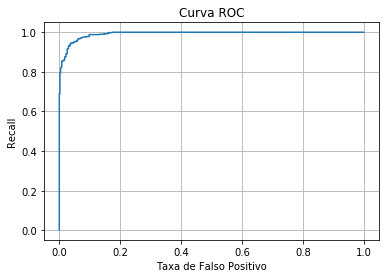

In [17]:
#Curva ROC
plt.plot(taxa_FP_fisher[0,:], recall_fisher[0,:])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Recall')
plt.title('Curva ROC')
plt.grid()
plt.show()

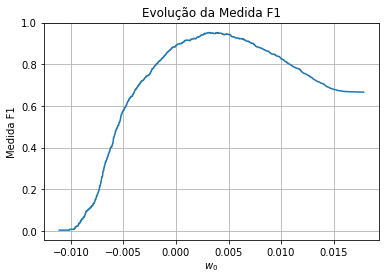

In [18]:
#Evolucao da Medida F1

plt.plot(intervalo_limiar.reshape((1, intervalo_limiar.shape[0]))[0,:], medida_F1_fisher[0,:])
plt.xlabel('$w_0$')
plt.ylabel('Medida F1')
plt.title('Evolução da Medida F1')
plt.grid()
plt.show()

Pela curva acima, notamos que valores muito pequenos para o parâmetro $w_0$ (_threshold_) levam a um baixo desempenho, segundo a medida $F_1$, do classificador, pois nesta situação, classificamos a maior parte dos padrões como pertencentes à classe $C_1$. Esse comportamento é observado na região da curva ROC associada à altas taxas de Falsos Positivos.

Temos o mesmo comportamento, _i.e_, baixo desempenho em termos de $F_1$, para valores muito elevados de $w_0$ (_threshold_). Nesta segunda situação, temos que a maior parte dos padrões é classificada como pertencente à classe $C_2$. Esse comportamento é refletido na região da curva ROC associada a baixos valores de _Recall_.

Valores de $w_0$ situados na faixa do (_threshold_) de 0.002 a 0.003 levam ao melhor desempenho do classificador, segundo a medida $F_1$. Nesse terceiro cenário, temos um equilíbrio na decisão, sem a predominância de uma classe sobre a outra. Este terceiro caso corresponde ao "joelho" da curva ROC, onde temos o melhor compromisso entre _Recall_ e a taxa de falsos positivos.

Na sequência, visualizaremos como o valor ótimo para $w_0$ se relaciona com o discriminante de Fisher.

In [19]:
ponto_max = np.argmax(medida_F1_fisher)
w0_otimo = intervalo_limiar[ponto_max]
print('Max. F1 (Fisher): ', np.max(medida_F1_fisher))
print('w_0 ótimo: ', w0_otimo)

Max. F1 (Fisher):  0.9536290322580645
w_0 ótimo:  0.003193326249286867


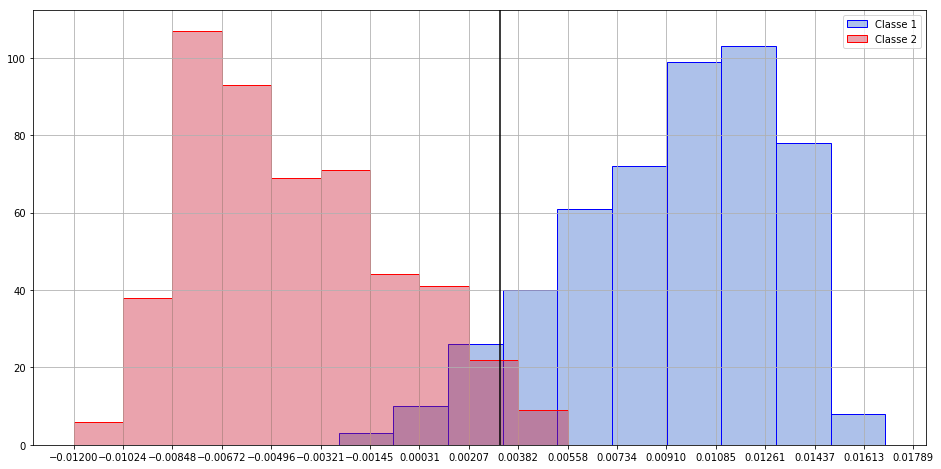

In [20]:
passo1 = (y1.max() - y1.min())/10
hist1, bin_edges1 = np.histogram(y1, bins = np.arange(y1.min(), y1.max()+passo1, passo1))

passo2 = (y2.max() - y2.min())/10
hist2, bin_edges2 = np.histogram(y2, bins = np.arange(y2.min(), y2.max()+passo2, passo2))

plt.figure(figsize=(16,8))

p1 = plt.bar(bin_edges1[:-1], hist1, width = passo1, color=(0.2, 0.4, 0.8, 0.4), edgecolor='blue')
p2 = plt.bar(bin_edges2[:-1], hist2, width = passo2, color=(0.8, 0.1, 0.2, 0.4), edgecolor='red')

passo = (passo1+passo2)/2

plt.legend((p1[0], p2[0]), ('Classe 1', 'Classe 2'))
plt.xticks(np.arange(y2.min()-passo2/2, y1.max()+passo2, passo2))
plt.axvline(x=w0_otimo, color='k') 
plt.grid()
plt.show()  

O que notamos do gráfico acima, é que o valor ótimo para $w_0$ (ou seja, o valor de $w_0$ que maximiza a medida $F_1$) situa-se bem próximo da faixa central do histograma, região esta que corresponde à região de sobreposição das classes. 

## Item d)

Classificação Binária por meio de Regressão Logística. Ajustamos o modelo por meio do critério de Correntropia Cruzada e ajustamos os parâmetros de modo iterativo. Empregamos 3000 épocas com uma taxa de adaptação (_learning rate_) $\lambda=1$.


In [21]:
N = matriz_two_moons.shape[0]
K = 2
MAX_EPOCAS = 3000
taxa_adaptacao = 1

phi = np.ones((N, K+1))
phi[:, 1:K+1] = matriz_two_moons[:, 1:K+1]
referencia = matriz_two_moons[:,3]
referencia = np.reshape(referencia, (referencia.shape[0], 1))

w, evolucao_norma_grad, evolucao_norma_w, evolucao_erro_medio = regressao_logistica(phi, MAX_EPOCAS, taxa_adaptacao, referencia)
w_logistica = w
estimativa = np.matmul(phi, w)
estimativa = 1 + np.exp(-estimativa)
estimativa = 1/estimativa

estimativa = estimativa.T
referencia = referencia.T


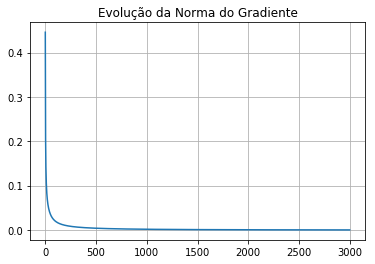

w:  [[ 3.67628951]
 [ 1.16821331]
 [-9.59033275]]


In [22]:
plt.plot(evolucao_norma_grad)
plt.grid()
plt.title('Evolução da Norma do Gradiente')
plt.show()
print('w: ', w)

In [23]:
passo = 1e-3
intervalo_limiar = np.arange(estimativa.min(), 0.99, passo)

recall_logistica = np.zeros((1, intervalo_limiar.shape[0]))
taxa_FP_logistica = np.zeros((1, intervalo_limiar.shape[0]))
medida_F1_logistica = np.zeros((1, intervalo_limiar.shape[0]))

indice = 0

for limiar in intervalo_limiar:
    
    estimativa_aux = np.copy(estimativa)
    estimativa_aux[estimativa_aux >= limiar] = 1
    estimativa_aux[estimativa_aux < limiar] = 0
    TP, TN, FP, FN = calcula_metricas(estimativa_aux, referencia)   
    recall_logistica[0, indice] = TP/(TP+FN)
    taxa_FP_logistica[0, indice] = FP/(TN+FP)
    precisao  = TP/(TP+FP)
    medida_F1_logistica[0, indice] = (2*recall_logistica[0, indice]*precisao)/(recall_logistica[0, indice] + precisao)
    
    indice = indice + 1   


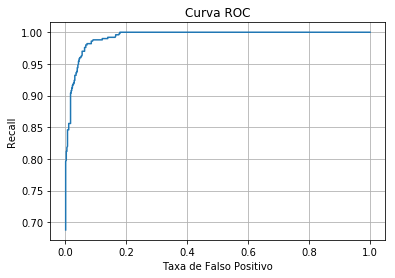

In [24]:
#Curva ROC
plt.plot(taxa_FP_logistica[0,:], recall_logistica[0,:])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Recall')
plt.title('Curva ROC')
plt.grid()
plt.show()

Observando a curva ROC acima, notamos que o desepenho do classificador obtido via Regressão Logística é bastante similar ao desempenho obtido através do discriminante de Fisher. Para melhor compararmos esses dois classificadores, vamos visualizar o gráfico conjunto das curvas ROC a seguir:

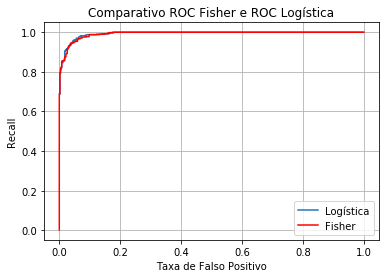

In [25]:
#Comparativo ROC Fisher e ROC Logistica
plt.plot(taxa_FP_logistica[0,:], recall_logistica[0,:])
plt.plot(taxa_FP_fisher[0,:], recall_fisher[0,:], color='r')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Recall')
plt.title('Comparativo ROC Fisher e ROC Logística')
plt.legend(('Logística', 'Fisher'))
plt.grid()
plt.show()

Do gráfico comparativo acima, notamos que o desempenho dos dois classificadores é extremamente parecido, em termos da curva de ROC. Análogo ao caso do discriminante de Fisher, valores muito pequenos (próximos a zero) para o limiar de decisão levam a um aumento na taxa de Falso Positivos, enquanto que valores muito elevados (próximos a um) levam a um baixo _Recall_.

Essa semelhança também se reflete na evolução da medida $F_1$ conforme variamos o limiar de decisão de $10^{-6}$ a $0.99$, como podemos visualizar na figura abaixo:

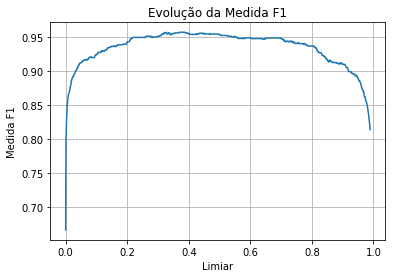

In [26]:
#Evolucao da Medida F1
plt.plot(intervalo_limiar.reshape((1, intervalo_limiar.shape[0]))[0,:], medida_F1_logistica[0,:])
plt.xlabel('Limiar')
plt.ylabel('Medida F1')
plt.title('Evolução da Medida F1')
plt.grid()
plt.show()

In [27]:
ponto_max = np.argmax(medida_F1_logistica)
limiar_otimo = intervalo_limiar[ponto_max]
print('Máx. F1 (Logística): ', np.max(medida_F1_logistica))
print('Limiar Ótimo: ', limiar_otimo)

Máx. F1 (Logística):  0.9575518262586377
Limiar Ótimo:  0.37000120009536686


Para o classificador obtido via discriminante de Fisher obtivemos $F_1(max) = 0,9536$ e para o caso da Regressão Logística obtivemos $F_1(max) = 0,9575$. Notamos também uma forte semelhança entre as curvas. No caso da Regressão Logística notamos que valores muito pequenos para o limiar de decisão (valores inferiores a $0,10$) ou valores muito grandes (superiodes a $0,80$), levam a um baixo desempenho do classficador. Temos uma melhoria no desempenho do classficador, dado aqui pela medida $F_1$, para valores situados entre $0,10$ e $0,80$. No nosso estudo, obtivemos $0,37$ como valor ótimo para o limiar de decisão. O que notamos neste caso, é que o classificador ajustado via Regressão Logística abaixou ligeiramente o limiar de decisão em relação ao limiar típico de $0,5$. Deste modo, o modelo de classificação via Regressão Logística apresenta um intervalo maior de classificação para a Classe 2 (rotulada por 1).

Na sequência vamos avaliar a fronteira de decisão do classificador via Regressão Logística com a reta ótima para o discriminate de Fisher.


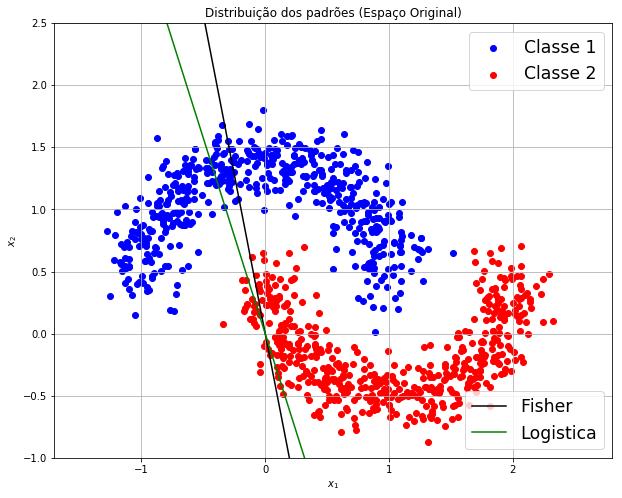

In [28]:
x1_1 = classe1[:,1]
x2_1 = classe1[:,2]

x1_2 = classe2[:,1]
x2_2 = classe2[:,2]

eixo_x1_fisher = np.arange(-1.5, 2.6, 1e-3)
eixo_x2_fisher = (w_fisher[1]/w_fisher[0])*eixo_x1_fisher

eixo_x1_logistica = np.arange(-1.5, 2.6, 1e-3)
eixo_x2_logistica = (-w_logistica[0]/w_logistica[1])*eixo_x1_logistica

plt.figure(figsize=(10,8))
disp1 = plt.scatter(x1_1, x2_1, label="classe1", c='b')
disp2 = plt.scatter(x1_2, x2_2, label="classe2", c='r')
reta1, = plt.plot(eixo_x1_fisher, eixo_x2_fisher, label="fisher", c='k')
reta2, = plt.plot(eixo_x1_logistica, eixo_x2_logistica, label="log", c='g')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.ylim((-1, 2.5))
first_legend = plt.legend((disp1, disp2), ('Classe 1', 'Classe 2'), loc=1, fontsize = 'xx-large')
ax = plt.gca().add_artist(first_legend)
plt.legend((reta1, reta2), ('Fisher', 'Logistica'), loc=4, fontsize = 'xx-large')
plt.grid()
plt.title('Distribuição dos padrões (Espaço Original)')
plt.show()

Novamente notamos a sememlhança entre os dois classificadores. Para o caso da regressão logística, a reta na cor verde corresponde à fronteira de decisão $\mathbf{w}^T\mathbf{x} = 0$. As duas retas obtidas estão bastante próximas, com a reta de projeção de Fisher ligeiramente mais inclinada.

# Parte 3 - Classificação Multi-Classe

## Item a)

Para o problema de Classificação Multi-Classe devemos classificar veículos em 4 categorias: "_Van_", "_Saab_", "_Bus_", e "_Opel_". Para isso, temos acesso a 18 atributos numéricos. Como os valores destes atributos excursionam em intervalos bastante distintos, realizamos uma normalização dos dados. Deste modo, todos os 18 atributos apresentam média nula e variância unitária.

Do conjunto de dados disponíveis, separamos $30\%$ para o conjunto de teste (_holdout_) e os demais $70\%$ para treinamento.


In [29]:
# leitura dos dados

dados_vehicle = pd.read_csv('./data/dataset_vehicle.csv')
matriz_vehicle = np.asarray(dados_vehicle) 

#normalizacao dos dados
medias = np.mean(matriz_vehicle[:, 0:18], axis=0)
medias = np.reshape(medias, (medias.shape[0], 1))
medias = medias.astype(float)
variancias = np.var(matriz_vehicle[:, 0:18], axis=0)
variancias = np.reshape(variancias, (variancias.shape[0],1))
variancias = variancias.astype(float)
desv_pad = np.sqrt(variancias)

for i in range(0, matriz_vehicle.shape[1]-1):
    matriz_vehicle[:,i] = matriz_vehicle[:,i] - medias[i]
    matriz_vehicle[:,i] = matriz_vehicle[:,i]/desv_pad[i]    
    

#Separacao em cjto de treinamento e de validacao
inicio_teste = int(np.floor(0.7*matriz_vehicle.shape[0]))
matriz_teste = matriz_vehicle[inicio_teste:matriz_vehicle.shape[0],:]
matriz_vehicle = matriz_vehicle[0:inicio_teste,:]
   
#dados de treinamento separados em classes
veiculo1 = matriz_vehicle[matriz_vehicle[:, 18]=='van']
veiculo2 = matriz_vehicle[matriz_vehicle[:, 18]=='saab']
veiculo3 = matriz_vehicle[matriz_vehicle[:, 18]=='bus']
veiculo4 = matriz_vehicle[matriz_vehicle[:, 18]=='opel']

Em seguida, treinamos 6 classificadores binários com modelo de regressão logística, uma vez que escolhemos a abordagem _um-contra-um_. Cada classificador foi treinado de modo iterativo, com gradiente em batelada (critério de Entropia Cruzada), num total de 5000 épocas e passo de adaptação $\lambda = 0,1$.

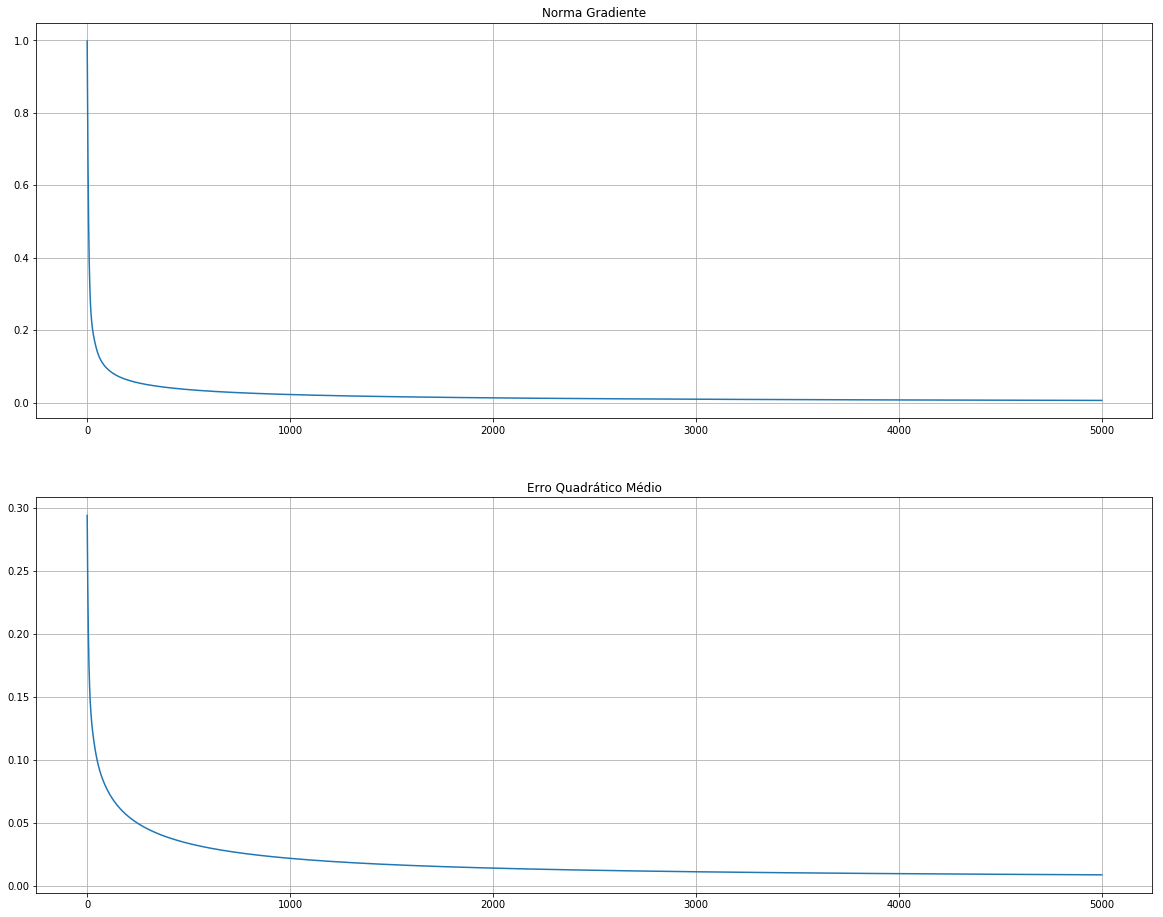

In [30]:
# Classificador C1: Classe 1 x Classe 2 
N = veiculo1.shape[0] + veiculo2.shape[0]
K = 18

phi = np.ones((N, K+1))
phi[0:veiculo1.shape[0], 1:19] = veiculo1[:,0:18]
phi[veiculo1.shape[0]:N, 1:19] = veiculo2[:,0:18]

referencia = np.ones((N,1))
referencia[veiculo1.shape[0]:N,0] = 0

randomize = np.arange(phi.shape[0])
np.random.shuffle(randomize)
phi = phi[randomize]
referencia = referencia[randomize]

MAX_EPOCAS = 5000
taxa_adaptacao = 0.1

wC1, evolucao_norma_grad, evolucao_norma_w, evolucao_erro_medio = regressao_logistica(phi, MAX_EPOCAS, taxa_adaptacao, referencia)

plt.figure(figsize=(20,16))
plt.subplot(2,1,1)
plt.plot(evolucao_norma_grad)
plt.grid()
plt.title('Norma Gradiente')

plt.subplot(2,1,2)
plt.plot(evolucao_erro_medio)
plt.grid()
plt.title('Erro Quadrático Médio')
plt.show()

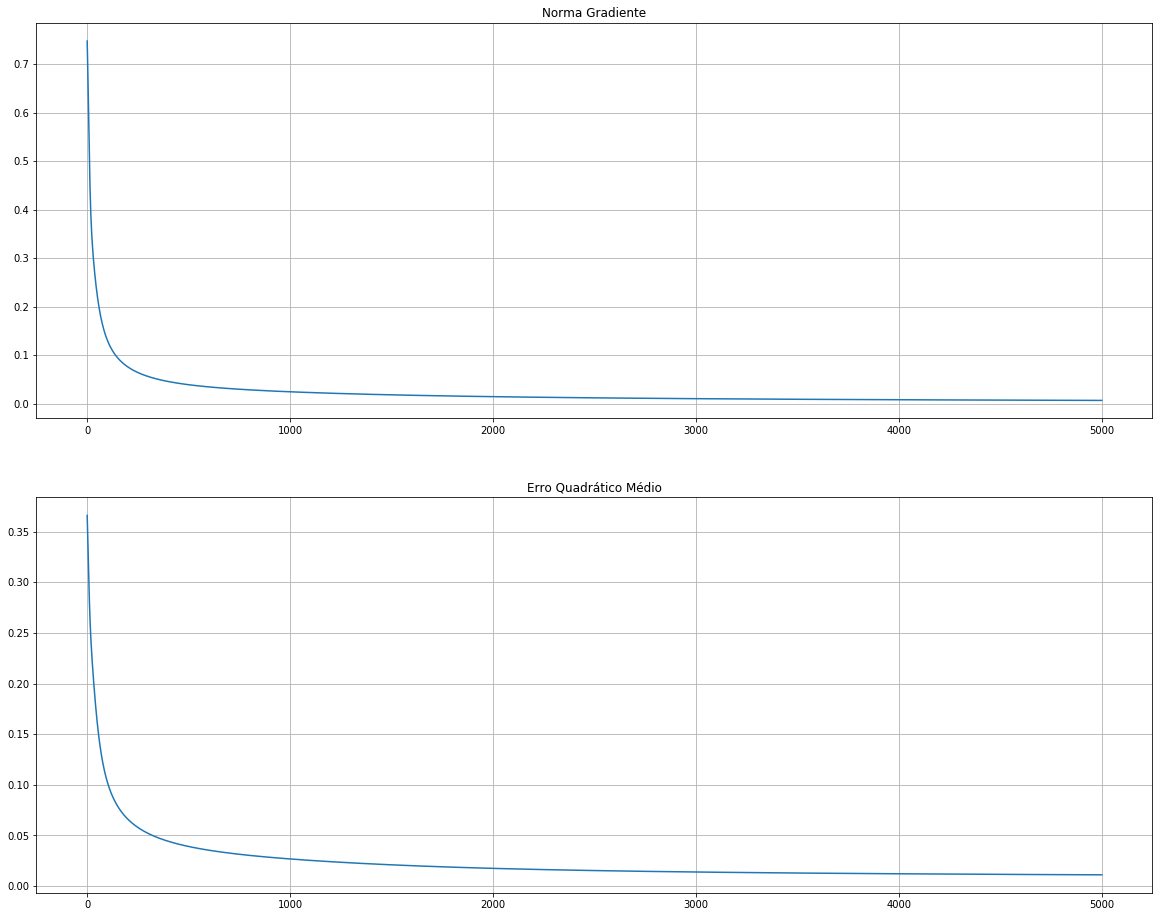

In [31]:
# Classificador C2: Classe 1 x Classe 3 
N = veiculo1.shape[0] + veiculo3.shape[0]
K = 18

phi = np.ones((N, K+1))
phi[0:veiculo1.shape[0], 1:19] = veiculo1[:,0:18]
phi[veiculo1.shape[0]:N, 1:19] = veiculo3[:,0:18]

referencia = np.ones((N,1))
referencia[veiculo1.shape[0]:N,0] = 0

randomize = np.arange(phi.shape[0])
np.random.shuffle(randomize)
phi = phi[randomize]
referencia = referencia[randomize]

MAX_EPOCAS = 5000
taxa_adaptacao = 0.1

wC2, evolucao_norma_grad, evolucao_norma_w, evolucao_erro_medio = regressao_logistica(phi, MAX_EPOCAS, taxa_adaptacao, referencia)

plt.figure(figsize=(20,16))
plt.subplot(2,1,1)
plt.plot(evolucao_norma_grad)
plt.grid()
plt.title('Norma Gradiente')

plt.subplot(2,1,2)
plt.plot(evolucao_erro_medio)
plt.grid()
plt.title('Erro Quadrático Médio')
plt.show()

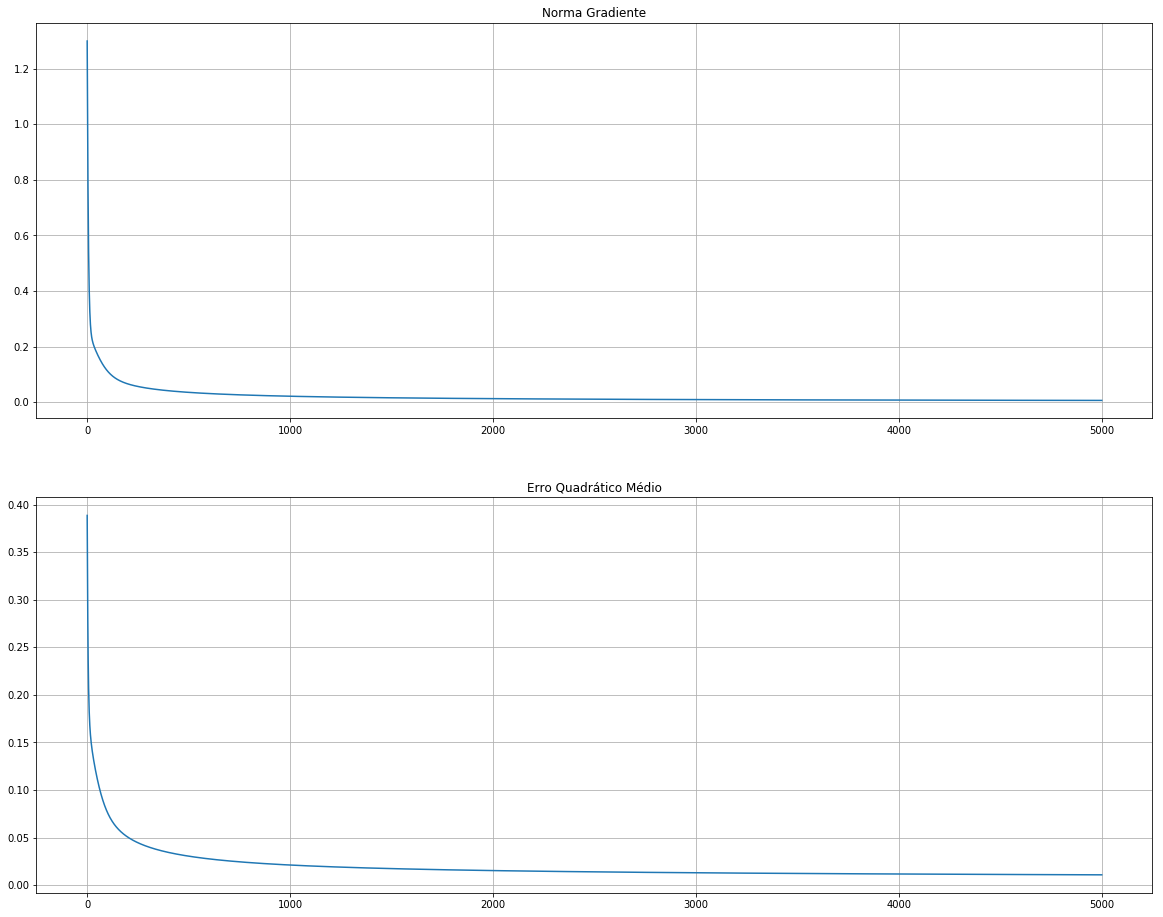

In [32]:
# Classificador C3: Classe 1 x Classe 4 
N = veiculo1.shape[0] + veiculo4.shape[0]
K = 18

phi = np.ones((N, K+1))
phi[0:veiculo1.shape[0], 1:19] = veiculo1[:,0:18]
phi[veiculo1.shape[0]:N, 1:19] = veiculo4[:,0:18]

referencia = np.ones((N,1))
referencia[veiculo1.shape[0]:N,0] = 0

randomize = np.arange(phi.shape[0])
np.random.shuffle(randomize)
phi = phi[randomize]
referencia = referencia[randomize]

MAX_EPOCAS = 5000
taxa_adaptacao = 0.1

wC3, evolucao_norma_grad, evolucao_norma_w, evolucao_erro_medio = regressao_logistica(phi, MAX_EPOCAS, taxa_adaptacao, referencia)

plt.figure(figsize=(20,16))
plt.subplot(2,1,1)
plt.plot(evolucao_norma_grad)
plt.grid()
plt.title('Norma Gradiente')

plt.subplot(2,1,2)
plt.plot(evolucao_erro_medio)
plt.grid()
plt.title('Erro Quadrático Médio')
plt.show()

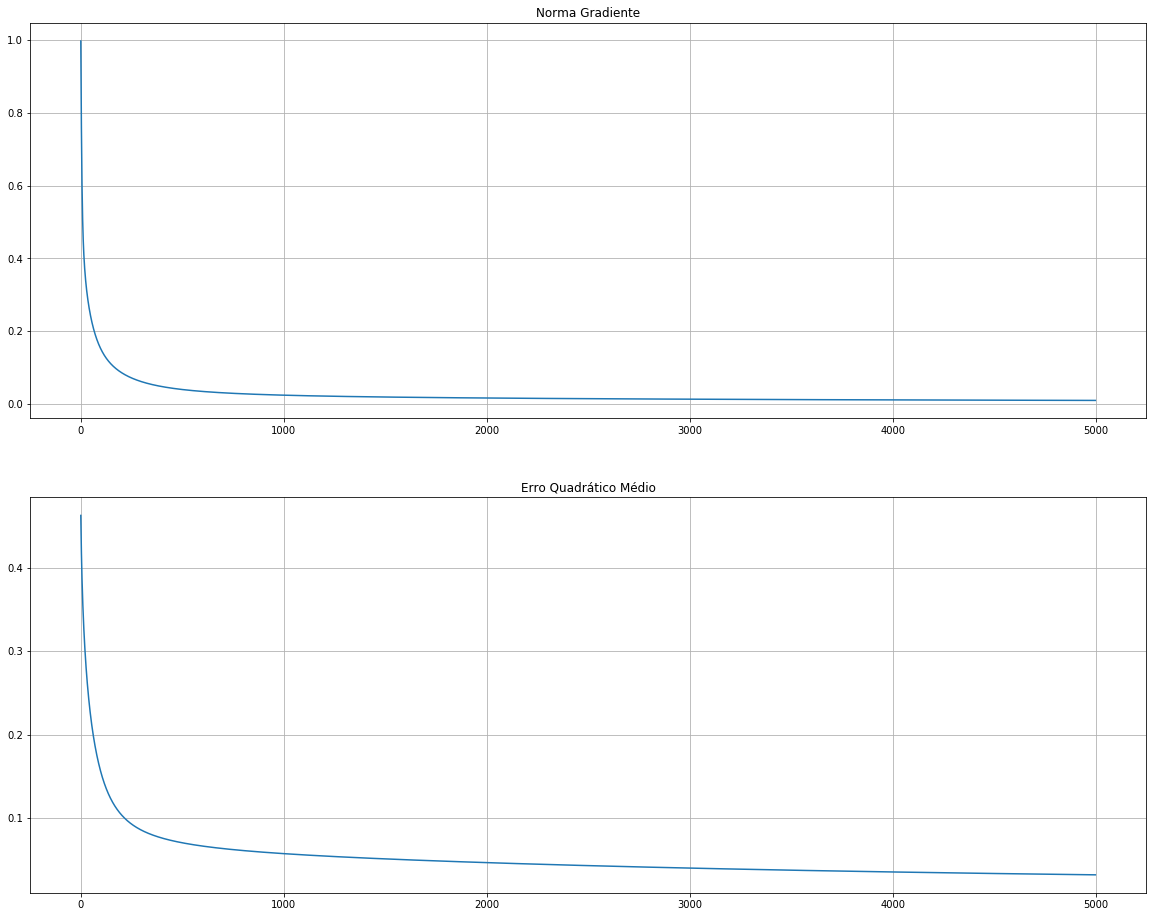

In [33]:
# Classificador C4: Classe 2 x Classe 3 
N = veiculo2.shape[0] + veiculo3.shape[0]
K = 18

phi = np.ones((N, K+1))
phi[0:veiculo2.shape[0], 1:19] = veiculo2[:,0:18]
phi[veiculo2.shape[0]:N, 1:19] = veiculo3[:,0:18]

referencia = np.ones((N,1))
referencia[veiculo2.shape[0]:N,0] = 0

randomize = np.arange(phi.shape[0])
np.random.shuffle(randomize)
phi = phi[randomize]
referencia = referencia[randomize]

MAX_EPOCAS = 5000
taxa_adaptacao = 0.1

wC4, evolucao_norma_grad, evolucao_norma_w, evolucao_erro_medio = regressao_logistica(phi, MAX_EPOCAS, taxa_adaptacao, referencia)

plt.figure(figsize=(20,16))
plt.subplot(2,1,1)
plt.plot(evolucao_norma_grad)
plt.grid()
plt.title('Norma Gradiente')

plt.subplot(2,1,2)
plt.plot(evolucao_erro_medio)
plt.grid()
plt.title('Erro Quadrático Médio')
plt.show()

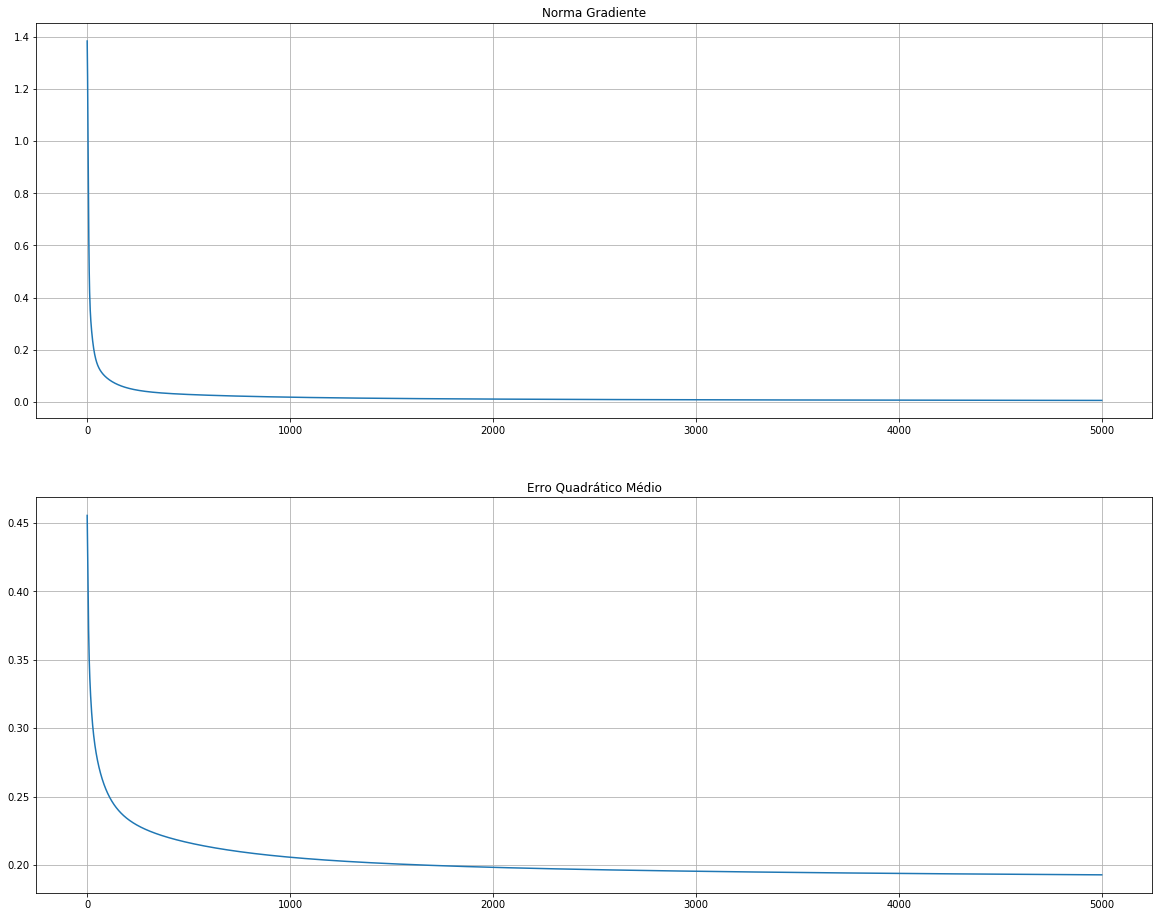

In [34]:
# Classificador C5: Classe 2 x Classe 4 
N = veiculo2.shape[0] + veiculo4.shape[0]
K = 18

phi = np.ones((N, K+1))
phi[0:veiculo2.shape[0], 1:19] = veiculo2[:,0:18]
phi[veiculo2.shape[0]:N, 1:19] = veiculo4[:,0:18]

referencia = np.ones((N,1))
referencia[veiculo2.shape[0]:N,0] = 0

randomize = np.arange(phi.shape[0])
np.random.shuffle(randomize)
phi = phi[randomize]
referencia = referencia[randomize]

MAX_EPOCAS = 5000
taxa_adaptacao = 0.1

wC5, evolucao_norma_grad, evolucao_norma_w, evolucao_erro_medio = regressao_logistica(phi, MAX_EPOCAS, taxa_adaptacao, referencia)

plt.figure(figsize=(20,16))
plt.subplot(2,1,1)
plt.plot(evolucao_norma_grad)
plt.grid()
plt.title('Norma Gradiente')

plt.subplot(2,1,2)
plt.plot(evolucao_erro_medio)
plt.grid()
plt.title('Erro Quadrático Médio')
plt.show()

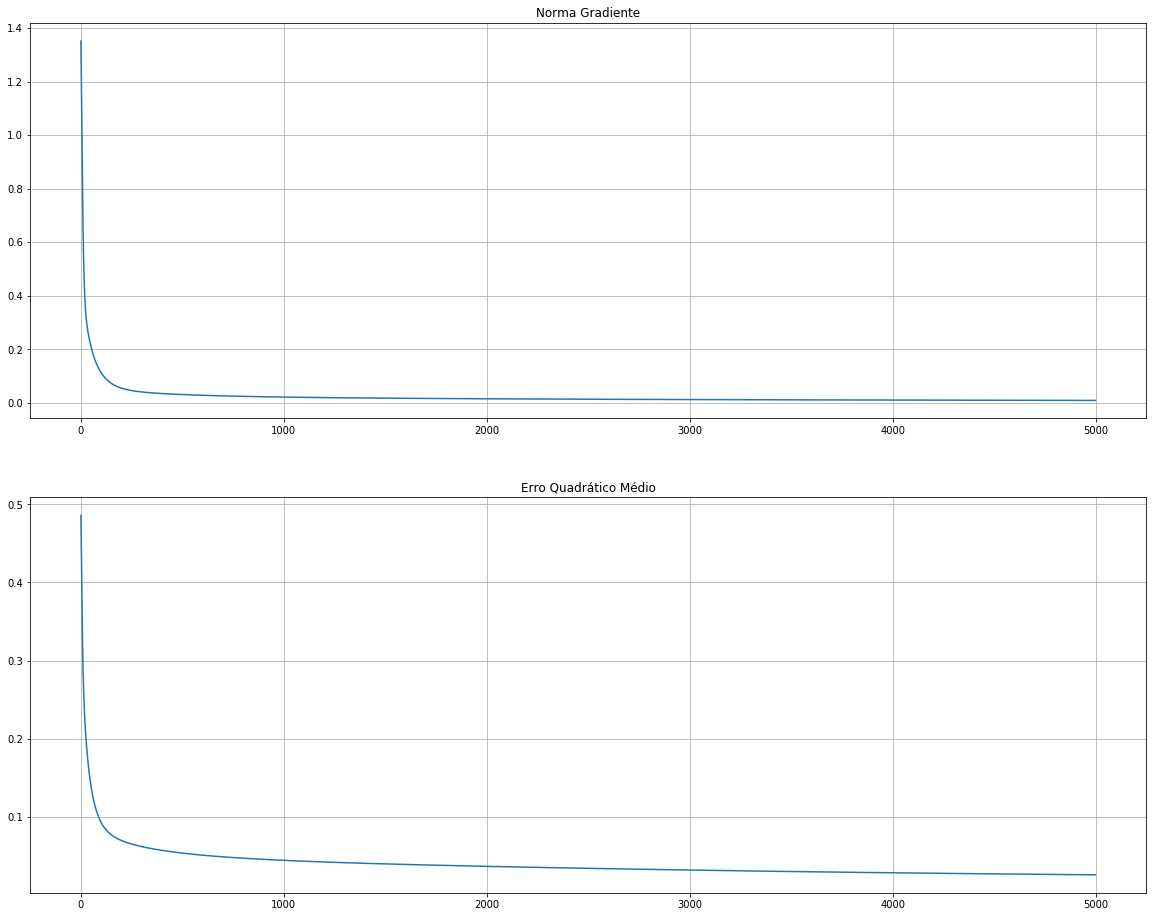

In [35]:
# Classificador C6: Classe 3 x Classe 4 
N = veiculo3.shape[0] + veiculo4.shape[0]
K = 18

phi = np.ones((N, K+1))
phi[0:veiculo3.shape[0], 1:19] = veiculo3[:,0:18]
phi[veiculo3.shape[0]:N, 1:19] = veiculo4[:,0:18]

referencia = np.ones((N,1))
referencia[veiculo3.shape[0]:N,0] = 0

randomize = np.arange(phi.shape[0])
np.random.shuffle(randomize)
phi = phi[randomize]
referencia = referencia[randomize]

MAX_EPOCAS = 5000
taxa_adaptacao = 0.1

wC6, evolucao_norma_grad, evolucao_norma_w, evolucao_erro_medio = regressao_logistica(phi, MAX_EPOCAS, taxa_adaptacao, referencia)

plt.figure(figsize=(20,16))
plt.subplot(2,1,1)
plt.plot(evolucao_norma_grad)
plt.grid()
plt.title('Norma Gradiente')

plt.subplot(2,1,2)
plt.plot(evolucao_erro_medio)
plt.grid()
plt.title('Erro Quadrático Médio')
plt.show()

Dos resultados anteriorres, notamos que os 6 classificadores convergiram durante o treinamento, como pode ser constatato tanto pela evolução da norma do grandiente, quanto pela evolução do erro quadrático médio.

_Obs.: O método de otimização que empregamos visa minimizar a Entropia Cruzada. Adotamos o Erro Quadrático Médio apenas pela simplicidade de cálculo e para termos uma informação sobre a qualidade do treinamento._

Com os 6 classificadores devidamente ajustados, realizamos a tarefa de classificação frente ao conjunto de teste. Para isso, adotamos o valor $\sigma=0.5$ para o limiar de decisão e montamos a matriz de confusão associada.

Para cada uma das classes, tomamos a maior distância absoluta entre a estimativa associada à classe em relação ao limiar $0.5$, como critério de desambiguação. Deste modo, quando duas ou mais classes recebem a mesma quantidade de votos, optamos por aquela cuja estimativa está mais distante do ponto de incerteza, o que indica uma classificação mais precisa.

In [36]:
# Validacao frente ao conjunto de teste
limiar_C1 = 0.5
limiar_C2 = 0.5
limiar_C3 = 0.5
limiar_C4 = 0.5
limiar_C5 = 0.5
limiar_C6 = 0.5

matriz_confusao = np.zeros((4,4))

classe1 = matriz_teste[matriz_teste[:, 18]=='van']
classe2 = matriz_teste[matriz_teste[:, 18]=='saab']
classe3 = matriz_teste[matriz_teste[:, 18]=='bus']
classe4 = matriz_teste[matriz_teste[:, 18]=='opel']

cjto_teste = np.ones((matriz_teste.shape[0],K+1)) #incorpora o bias
cjto_teste[:, 1:19] = matriz_teste[:,0:18]

for i in range(0, matriz_teste.shape[0]):
    
    voto_classes = np.zeros((4,1))
        
    estimativa_C1 = avaliacao_logistica(wC1, cjto_teste[i,0:19])
    estimativa_C2 = avaliacao_logistica(wC2, cjto_teste[i,0:19])
    estimativa_C3 = avaliacao_logistica(wC3, cjto_teste[i,0:19])
    estimativa_C4 = avaliacao_logistica(wC4, cjto_teste[i,0:19])
    estimativa_C5 = avaliacao_logistica(wC5, cjto_teste[i,0:19])
    estimativa_C6 = avaliacao_logistica(wC6, cjto_teste[i,0:19])
    
    fator_desempate = np.zeros((4,1))   
    
    if(estimativa_C1 >= limiar_C1):
        voto_classes[0] = voto_classes[0] + 1 #decisao pela classe 1
        if(abs(estimativa_C1-0.5) > fator_desempate[0]): #atualiza o fator de desempate
            fator_desempate[0] = abs(estimativa_C1-0.5)
    else:
        voto_classes[1] = voto_classes[1] + 1 #decisao pela classe 2
        if(abs(estimativa_C2-0.5) > fator_desempate[1]): #atualiza o fator de desempate
            fator_desempate[1] = abs(estimativa_C2-0.5)
        
    if(estimativa_C2 >= limiar_C2):
        voto_classes[0] = voto_classes[0] + 1 #decisao pela classe 1
        if(abs(estimativa_C1-0.5) > fator_desempate[0]): #atualiza o fator de desempate
            fator_desempate[0] = abs(estimativa_C1-0.5)
    else:
        voto_classes[2] = voto_classes[2] + 1 #decisao pela classe 3
        if(abs(estimativa_C3-0.5) > fator_desempate[2]): #atualiza o fator de desempate
            fator_desempate[2] = abs(estimativa_C3-0.5)
        
    if(estimativa_C3 >= limiar_C3):
        voto_classes[0] = voto_classes[0] + 1 #decisao pela classe 1
        if(abs(estimativa_C1-0.5) > fator_desempate[0]): #atualiza o fator de desempate
            fator_desempate[0] = abs(estimativa_C1-0.5)
    else:
        voto_classes[3] = voto_classes[3] + 1 #decisao pela classe 4
        if(abs(estimativa_C4-0.5) > fator_desempate[3]): #atualiza o fator de desempate
            fator_desempate[3] = abs(estimativa_C4-0.5)
        
    if(estimativa_C4 >= limiar_C4):
        voto_classes[1] = voto_classes[1] + 1 #decisao pela classe 2
        if(abs(estimativa_C2-0.5) > fator_desempate[1]): #atualiza o fator de desempate
            fator_desempate[1] = abs(estimativa_C2-0.5)
    else:
        voto_classes[2] = voto_classes[2] + 1 #decisao pela classe 3
        if(abs(estimativa_C3-0.5) > fator_desempate[2]): #atualiza o fator de desempate
            fator_desempate[2] = abs(estimativa_C3-0.5)
        
    if(estimativa_C5 >= limiar_C5):
        voto_classes[1] = voto_classes[1] + 1 #decisao pela classe 2
        if(abs(estimativa_C2-0.5) > fator_desempate[1]): #atualiza o fator de desempate
            fator_desempate[1] = abs(estimativa_C2-0.5)
    else:
        voto_classes[3] = voto_classes[3] + 1 #decisao pela classe 4
        if(abs(estimativa_C4-0.5) > fator_desempate[3]): #atualiza o fator de desempate
            fator_desempate[3] = abs(estimativa_C4-0.5)
        
    if(estimativa_C6 >= limiar_C6):
        voto_classes[2] = voto_classes[2] + 1 #decisao pela classe 3
        if(abs(estimativa_C3-0.5) > fator_desempate[2]): #atualiza o fator de desempate
            fator_desempate[2] = abs(estimativa_C3-0.5)
    else:
        voto_classes[3] = voto_classes[3] + 1 #decisao pela classe 4
        if(abs(estimativa_C4-0.5) > fator_desempate[3]): #atualiza o fator de desempate
            fator_desempate[3] = abs(estimativa_C4-0.5)        
 
    decisao = np.argmax(voto_classes) #toma o voto majoritario
    
    if(voto_classes.max() == 2): #houve empate
        decisao = np.argmax(fator_desempate)

    #atualiza a matriz de confusao
    if(matriz_teste[i,18] == 'van'):
        matriz_confusao[0, decisao] = matriz_confusao[0, decisao] + 1
    elif(matriz_teste[i,18] == 'saab'):
        matriz_confusao[1, decisao] = matriz_confusao[1, decisao] + 1
    elif(matriz_teste[i,18] == 'bus'):
        matriz_confusao[2, decisao] = matriz_confusao[2, decisao] + 1
    else:
        matriz_confusao[3, decisao] = matriz_confusao[3, decisao] + 1


In [37]:
classes = ['van', 'saab', 'bus', 'opel']
imprime_matriz_confusao(matriz_confusao.astype(int), classes)

	  van    saab   bus    opel  
van 	 58 	  1 	  0 	  0 	 
saab 	  2 	 53 	  2 	 16 	 
bus 	  0 	  1 	 60 	  1 	 
opel 	  3 	 18 	  2 	 37 	 


Da matriz de confusão acima, podemos ver uma classificação muito boa para as classes "Van" e "Bus", como podemos constatar das linhas 1 e 3 da matriz de confusão. Vemos que nestas linhas, a maior parte dos dados está na categorizada na diagonal da matriz, ou seja, na posição correspondente à métrica de "Verdadeiros Positivos".

Por outro lado, notamos um maior erro entre as classes "Saab" e "Opel", como podemos ver pelas linhas 2 e 4. Notamos que de todos os padrões rotulados como "Saab", 16 foram confundidos com o modelo "Opel". Já pela linha 4, notamos que de todos os modelos "Opel", 18 foram confundidos com os modelos "Saab".

Para avaliar o desempenho médio do clasificador, adotamos a **Acurácia Média**:


In [38]:
# Calculo da Acurácia de cada classe

total_elementos = int(matriz_confusao.sum())

# Classe 1: Van
TP = matriz_confusao[0,0]
TN = total_elementos - TP - matriz_confusao[0, 1:4].sum() - matriz_confusao[1:4,0].sum()
Acc1_log = (TP + TN)/total_elementos

# Classe 2: Saab
TP = matriz_confusao[1,1]
TN = total_elementos - matriz_confusao[1,:].sum() - matriz_confusao[:, 1].sum() + TP
Acc2_log = (TP + TN)/total_elementos

# Classe 3: Bus
TP = matriz_confusao[2,2]
TN = total_elementos - matriz_confusao[2,:].sum() - matriz_confusao[:, 2].sum() + TP
Acc3_log = (TP + TN)/total_elementos

# Classe 4: Opel
TP = matriz_confusao[3,3]
TN = total_elementos - matriz_confusao[3,:].sum() - matriz_confusao[:, 3].sum() + TP
Acc4_log = (TP + TN)/total_elementos

#Acuracia Média 
Acc_media_log = (Acc1_log + Acc2_log + Acc3_log + Acc4_log)/4


In [39]:
print('Acurácia Classe 1 (Van)  [%]: \t\t', Acc1_log*100)
print('Acurácia Classe 2 (Saab) [%]: \t\t', Acc2_log*100)
print('Acurácia Classe 3 (Bus)  [%]: \t\t', Acc3_log*100)
print('Acurácia Classe 4 (Opel) [%]: \t\t', Acc4_log*100)
print('Acurácia Média do Classificador [%]: \t', Acc_media_log*100)

Acurácia Classe 1 (Van)  [%]: 		 97.63779527559055
Acurácia Classe 2 (Saab) [%]: 		 84.25196850393701
Acurácia Classe 3 (Bus)  [%]: 		 97.63779527559055
Acurácia Classe 4 (Opel) [%]: 		 84.25196850393701
Acurácia Média do Classificador [%]: 	 90.94488188976378


Dos resultados acima, notamos um bom desempenho do classificador para as categorias "Van" e "Bus", nas quais o processo de classficação obteve uma acurácia e 96,06% e 97,24%, respectiamente, em conformidade com o resultado que havíamos observado na matriz de confusão.

Novamente podemos notar a dificuldade em separar as classes "Saab" e "Opel", para os quais obtivemos acurácias de 83,46% e 83,85% respectivamente, valores inferiores aos obtidos para as demais categorias. 

Com estes resultados, obtivemos um acurácia média de 90,15% para o classificador com modelo de regressão logística.

## Item b)

Neste segundo item, adotaremos o método $k-$NN na tarefa de classificação multi-classe. Variamos o parâmetro $k$ no intervalo $[1, 20]$ e adotamos a distância Euclidiana (norma $\ell_2$). Tomamos o voto majoritário do $k$ vizinhos mais próximos como rótulo para o padrão de teste.

In [40]:
k_max = 20
historico_acuracia = np.zeros((5, k_max)) #linha 0: Classe 1 ... linha 3: Classe 4, linha 4: acuracia media
historico_matrizes_confusao = np.zeros((4,4,k_max))

for k in range(1, k_max+1):
    vetor_distancias = np.zeros((matriz_vehicle.shape[0], 2))
    vetor_distancias[:,0] = np.arange(0, matriz_vehicle.shape[0])

    matriz_confusao = np.zeros((4,4))

    for i in range(0, matriz_teste.shape[0]):
        #distancia entre o padrao de teste e os de treinamento
        matriz_diferencas = matriz_teste[i, 0:18] - matriz_vehicle[:, 0:18]
        matriz_diferencas = matriz_diferencas.astype(float)
        vetor_distancias[:,1] = np.linalg.norm(matriz_diferencas, axis=1)
    
        p = np.argsort(vetor_distancias[:, 1])
        distancias_ordenadas = vetor_distancias[p]  
    
        voto_classes = np.zeros((4,1))
    
        for j in range(0, k):
            indice_vizinho = int(distancias_ordenadas[j, 0])
            if(matriz_vehicle[indice_vizinho, 18] == 'van'):
                voto_classes[0] = voto_classes[0] + 1
            elif(matriz_vehicle[indice_vizinho, 18] == 'saab'):
                voto_classes[1] = voto_classes[1] + 1
            elif(matriz_vehicle[indice_vizinho, 18] == 'bus'):
                voto_classes[2] = voto_classes[2] + 1
            else:
                voto_classes[3] = voto_classes[3] + 1
            
        #voto majoritario
        decisao = np.argmax(voto_classes) 

        #atualiza a matriz de confusao
        if(matriz_teste[i,18] == 'van'):
            matriz_confusao[0, decisao] = matriz_confusao[0, decisao] + 1
        elif(matriz_teste[i,18] == 'saab'):
            matriz_confusao[1, decisao] = matriz_confusao[1, decisao] + 1
        elif(matriz_teste[i,18] == 'bus'):
            matriz_confusao[2, decisao] = matriz_confusao[2, decisao] + 1
        else:
            matriz_confusao[3, decisao] = matriz_confusao[3, decisao] + 1   

    # Calculo da Acurácia de cada classe

    total_elementos = int(matriz_confusao.sum())

    # Classe 1: Van
    TP = matriz_confusao[0,0]
    TN = total_elementos - TP - matriz_confusao[0, 1:4].sum() - matriz_confusao[1:4,0].sum()
    Acc1 = (TP + TN)/total_elementos

    # Classe 2: Saab
    TP = matriz_confusao[1,1]
    TN = total_elementos - matriz_confusao[1,:].sum() - matriz_confusao[:, 1].sum() + TP
    Acc2 = (TP + TN)/total_elementos

    # Classe 3: Bus
    TP = matriz_confusao[2,2]
    TN = total_elementos - matriz_confusao[2,:].sum() - matriz_confusao[:, 2].sum() + TP
    Acc3 = (TP + TN)/total_elementos

    # Classe 4: Opel
    TP = matriz_confusao[3,3]
    TN = total_elementos - matriz_confusao[3,:].sum() - matriz_confusao[:, 3].sum() + TP
    Acc4 = (TP + TN)/total_elementos

    #Acuracia Média 
    Acc_media = (Acc1 + Acc2 + Acc3 + Acc4)/4    
    
    #historico dos dados
    historico_acuracia[0, k-1] = Acc1
    historico_acuracia[1, k-1] = Acc2
    historico_acuracia[2, k-1] = Acc3
    historico_acuracia[3, k-1] = Acc4
    historico_acuracia[4, k-1] = Acc_media    
    historico_matrizes_confusao[:, :, k-1] = matriz_confusao

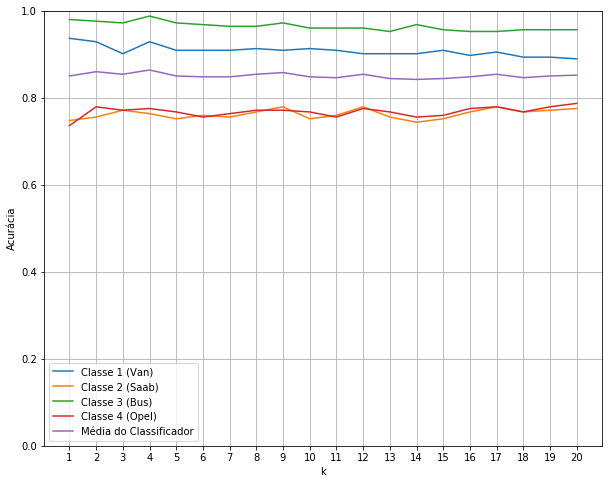

In [41]:
plt.figure(figsize=(10,8))
plt.plot(range(1, k_max+1),  historico_acuracia[0, :])
plt.plot(range(1, k_max+1),  historico_acuracia[1, :])
plt.plot(range(1, k_max+1),  historico_acuracia[2, :])
plt.plot(range(1, k_max+1),  historico_acuracia[3, :])
plt.plot(range(1, k_max+1),  historico_acuracia[4, :])
plt.legend(('Classe 1 (Van)', 'Classe 2 (Saab)', 'Classe 3 (Bus)', 'Classe 4 (Opel)', 'Média do Classificador'))
plt.xticks(range(1, k_max+1))
plt.ylim(0,1)
plt.ylabel('Acurácia')
plt.xlabel('k')
plt.grid()
plt.show()

Do resultado acima, notamos que a acurácia do classificador, tanto para cada uma das 4 classes consideradas quanto o desempenho médio, variou pouco em função do parâmetro $k$. O melhor desempenho, em termos de acurácia é obsevado na classe "Bus", seguida pela classe "Van". Notamos desempenhos inferiores e bastante próximos para as classes "Saab" e "Opel".  

Do resultado acima, não notamos diferenças significativas na acurácia quando usamos um valor par ou ímpar para o parâmetro $k$. Em nossa abordagem, nos casos de empate (que ocorrem somente para $k$ par) decidimos pela classe de menor índice, por simplicidade computacional. Notamos que o desempenho não varia drasticamente em função da paridade de $k$. 

Para comparar o desempenho da classifiação usando o método $k$-NN com o modelo de regressão logística, comparamos a acurácia de ambos os modelos, tanto por classe quanto média. Para isso, geramos os gráficos da evolução da acurácia obtida com o $k$-NN em função de $k$ e tomamos o desempenho do modelo logístico como assíntota. 


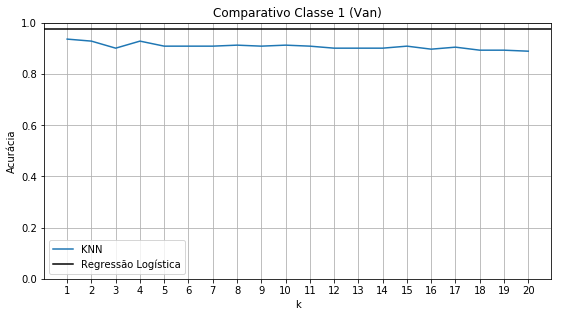

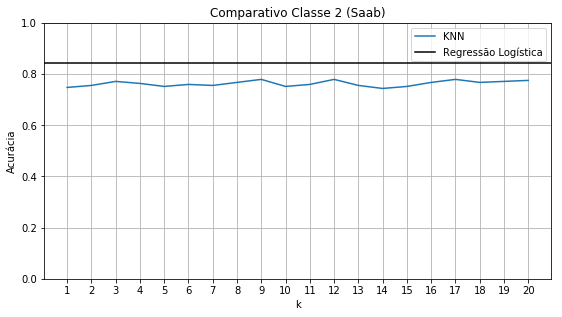

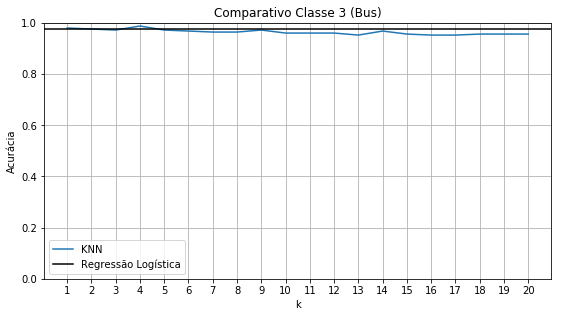

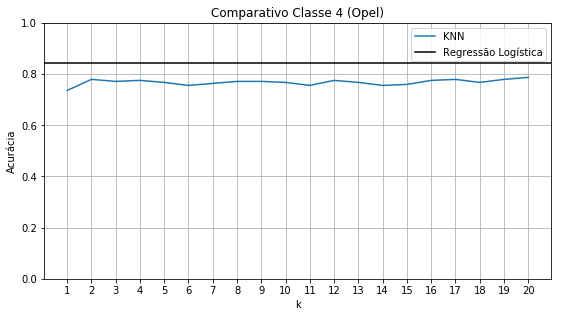

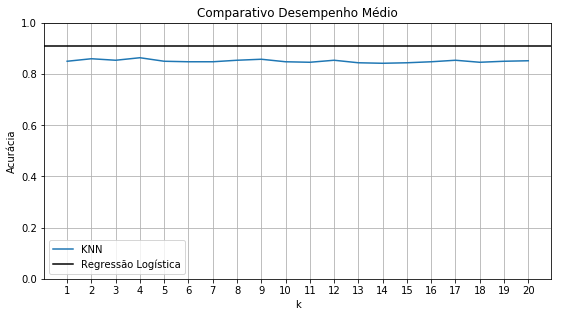

In [42]:
plt.figure(figsize=(20,16))
plt.subplot(3,2,1)
plt.plot(range(1, k_max+1),  historico_acuracia[0, :])
plt.axhline(y=Acc1_log, color='k') #assintota classe 1
plt.xticks(range(1, k_max+1))
plt.ylim(0,1)
plt.grid()
plt.ylabel('Acurácia')
plt.xlabel('k')
plt.legend(('KNN', 'Regressão Logística'))
plt.title('Comparativo Classe 1 (Van)')
plt.show()

plt.figure(figsize=(20,16))
plt.subplot(3,2,2)
plt.plot(range(1, k_max+1),  historico_acuracia[1, :])
plt.axhline(y=Acc2_log, color='k') #assintota classe 2
plt.xticks(range(1, k_max+1))
plt.ylim(0,1)
plt.grid()
plt.ylabel('Acurácia')
plt.xlabel('k')
plt.legend(('KNN', 'Regressão Logística'))
plt.title('Comparativo Classe 2 (Saab)')
plt.show()

plt.figure(figsize=(20,16))
plt.subplot(3,2,3)
plt.plot(range(1, k_max+1),  historico_acuracia[2, :])
plt.axhline(y=Acc3_log, color='k') #assintota classe 3
plt.xticks(range(1, k_max+1))
plt.ylim(0,1)
plt.grid()
plt.ylabel('Acurácia')
plt.xlabel('k')
plt.legend(('KNN', 'Regressão Logística'))
plt.title('Comparativo Classe 3 (Bus)')
plt.show()

plt.figure(figsize=(20,16))
plt.subplot(3,2,4)
plt.plot(range(1, k_max+1),  historico_acuracia[3, :])
plt.axhline(y=Acc4_log, color='k') #assintota classe 4
plt.xticks(range(1, k_max+1))
plt.ylim(0,1)
plt.grid()
plt.ylabel('Acurácia')
plt.xlabel('k')
plt.legend(('KNN', 'Regressão Logística'))
plt.title('Comparativo Classe 4 (Opel)')
plt.show()

plt.figure(figsize=(20,16))
plt.subplot(3,2,5)
plt.plot(range(1, k_max+1),  historico_acuracia[4, :])
plt.axhline(y=Acc_media_log, color='k') #assintota classe 4
plt.xticks(range(1, k_max+1))
plt.ylim(0,1)
plt.grid()
plt.ylabel('Acurácia')
plt.xlabel('k')
plt.legend(('KNN', 'Regressão Logística'))
plt.title('Comparativo Desempenho Médio')
plt.show()

Com exceção de um caso particular para a Classe 3 ("Bus"), notamos que a acurácia do modelo baseado em $k$-NN é inferior à do modelo de regressão logística, tanto considerando classes individuais quanto o desempenho médio do classificador.

Podemos notar este mesmo fenômeno nas matrizes de confusão. Abaixo, apresentamos as matrizes obtidas para $k=1, 5, 10$ e $15$:

In [43]:
classes = ['van', 'saab', 'bus', 'opel']
start = "\033[1m"
end = "\033[0;0m"

print (start + "\tMatriz de Confusão k=1" + end)

imprime_matriz_confusao(historico_matrizes_confusao[:,:, 0].astype(int), classes)
print('===========================================================')
print('Acurácia Classe 1 (Van)  [%]: \t\t', historico_acuracia[0, 0]*100)
print('Acurácia Classe 2 (Saab) [%]: \t\t', historico_acuracia[1, 0]*100)
print('Acurácia Classe 3 (Bus)  [%]: \t\t', historico_acuracia[2, 0]*100)
print('Acurácia Classe 4 (Opel) [%]: \t\t', historico_acuracia[3, 0]*100)
print('Acurácia Média do Classificador [%]: \t',  historico_acuracia[4, 0]*100)
print('===========================================================')
print('')                                         
    
print (start + "\tMatriz de Confusão k=5" + end)
imprime_matriz_confusao(historico_matrizes_confusao[:,:, 4].astype(int), classes)
print('===========================================================')
print('Acurácia Classe 1 (Van)  [%]: \t\t', historico_acuracia[0, 4]*100)
print('Acurácia Classe 2 (Saab) [%]: \t\t', historico_acuracia[1, 4]*100)
print('Acurácia Classe 3 (Bus)  [%]: \t\t', historico_acuracia[2, 4]*100)
print('Acurácia Classe 4 (Opel) [%]: \t\t', historico_acuracia[3, 4]*100)
print('Acurácia Média do Classificador [%]: \t',  historico_acuracia[4, 4]*100)
print('===========================================================')
print('')

print (start + "\tMatriz de Confusão k=10" + end)
imprime_matriz_confusao(historico_matrizes_confusao[:,:, 9].astype(int), classes)
print('===========================================================')
print('Acurácia Classe 1 (Van)  [%]: \t\t', historico_acuracia[0, 9]*100)
print('Acurácia Classe 2 (Saab) [%]: \t\t', historico_acuracia[1, 9]*100)
print('Acurácia Classe 3 (Bus)  [%]: \t\t', historico_acuracia[2, 9]*100)
print('Acurácia Classe 4 (Opel) [%]: \t\t', historico_acuracia[3, 9]*100)
print('Acurácia Média do Classificador [%]: \t',  historico_acuracia[4, 9]*100)
print('===========================================================')
print('')

print (start + "\tMatriz de Confusão k=15" + end)
imprime_matriz_confusao(historico_matrizes_confusao[:,:, 14].astype(int), classes)
print('===========================================================')
print('Acurácia Classe 1 (Van)  [%]: \t\t', historico_acuracia[0, 14]*100)
print('Acurácia Classe 2 (Saab) [%]: \t\t', historico_acuracia[1, 14]*100)
print('Acurácia Classe 3 (Bus)  [%]: \t\t', historico_acuracia[2, 14]*100)
print('Acurácia Classe 4 (Opel) [%]: \t\t', historico_acuracia[3, 14]*100)
print('Acurácia Média do Classificador [%]: \t',  historico_acuracia[4, 14]*100)
print('===========================================================')
print('')

	Matriz de Confusão k=1
	  van    saab   bus    opel  
van 	 52 	  3 	  1 	  3 	 
saab 	  5 	 35 	  0 	 33 	 
bus 	  0 	  0 	 61 	  1 	 
opel 	  4 	 23 	  3 	 30 	 
Acurácia Classe 1 (Van)  [%]: 		 93.7007874015748
Acurácia Classe 2 (Saab) [%]: 		 74.80314960629921
Acurácia Classe 3 (Bus)  [%]: 		 98.03149606299213
Acurácia Classe 4 (Opel) [%]: 		 73.62204724409449
Acurácia Média do Classificador [%]: 	 85.03937007874016

	Matriz de Confusão k=5
	  van    saab   bus    opel  
van 	 51 	  4 	  4 	  0 	 
saab 	  7 	 38 	  1 	 27 	 
bus 	  0 	  1 	 61 	  0 	 
opel 	  8 	 23 	  1 	 28 	 
Acurácia Classe 1 (Van)  [%]: 		 90.94488188976378
Acurácia Classe 2 (Saab) [%]: 		 75.19685039370079
Acurácia Classe 3 (Bus)  [%]: 		 97.24409448818898
Acurácia Classe 4 (Opel) [%]: 		 76.77165354330708
Acurácia Média do Classificador [%]: 	 85.03937007874016

	Matriz de Confusão k=10
	  van    saab   bus    opel  
van 	 55 	  0 	  3 	  1 	 
saab 	  9 	 39 	  4 	 21 	 
bus 	  0 	  2 	 60 	  0 	 
opel 	  9

Análogo ao classificador baseado em Regressão Logística, notamos um bom desempenho do classificador para distinguir as classes 1 ("Van") e 3 ("Bus"). Novamente, notamos erros maiores de classificaçãoe entre as classes 2 ("Saab") e 4 ("Opel"). Pela similaridade entre as matrizes de confusão, vemos novamente a baixa influência da paridade do parâmetro $k$ na classificação.

De modo geral, as classes "Saab" e "Opel" apresentam grandes similaridades entre seus atributos, o que torna a tarefa de classificação mais desafiadora, o que limita o desempenho dos classificadores estudados na separação destas duas classes.

Uma possível abordagem para este problema consiste no uso de classificadores não-lineares, _e.g._, classificadores baseados em redes neurais artificiais ou SVMs (dado um mapeamento adequado).

